<a href="https://colab.research.google.com/github/hosseinrezaie0/30-AI-Projects-in-30-Days/blob/main/Day%201/Image%20Classificaiton%20-%20Hand%20Written%20Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()

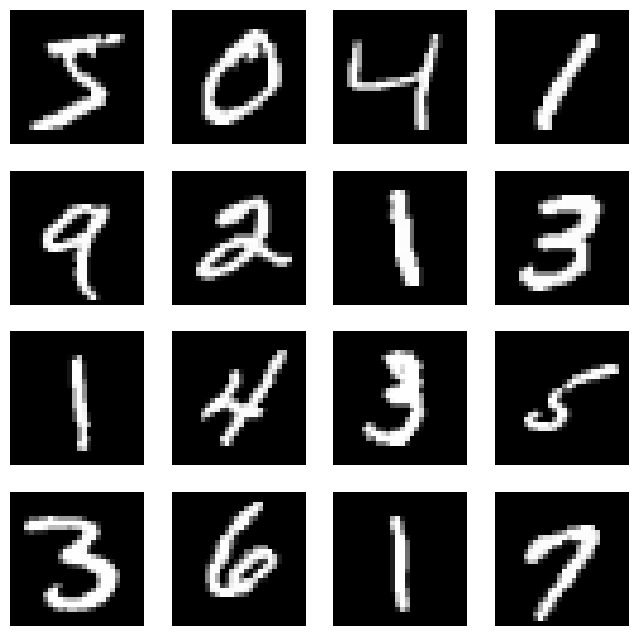

In [3]:
# Plot 16 ranom samples of the mnist dataset
fig,axes = plt.subplots(4,4,figsize=(8,8))
for i in range(4):
  for j in range(4):
    axes[i][j].imshow(x_train[i*4+j],cmap='gray')
    axes[i][j].axis('off')
plt.show()

In [4]:
# Nomalize the data's values to [0,1]
x_train = x_train / 255
x_test = x_test / 255

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
# Reshape the data to be 3 dimensional
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [7]:
x_train.shape

(60000, 28, 28, 1)

In [8]:
y_train[0]

5

In [9]:
# Convet the labels to one hot vectors so we can use categorical_crossentropy
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [11]:
# Build the model
model = models.Sequential()

In [12]:
# First layer
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))

# Second layer
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

# Third layer
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))

# Flatten the data
model.add(layers.Flatten())

# Fourth layer
model.add(layers.Dense(64, activation='relu'))

# Fifth layer
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(x_train, y_train, epochs=5,batch_size=64, validation_split=0.2)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8675 - loss: 0.4418 - val_accuracy: 0.9807 - val_loss: 0.0661
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9823 - loss: 0.0573 - val_accuracy: 0.9846 - val_loss: 0.0486
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9886 - loss: 0.0354 - val_accuracy: 0.9865 - val_loss: 0.0456
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9902 - loss: 0.0283 - val_accuracy: 0.9877 - val_loss: 0.0410
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9927 - loss: 0.0229 - val_accuracy: 0.9903 - val_loss: 0.0340


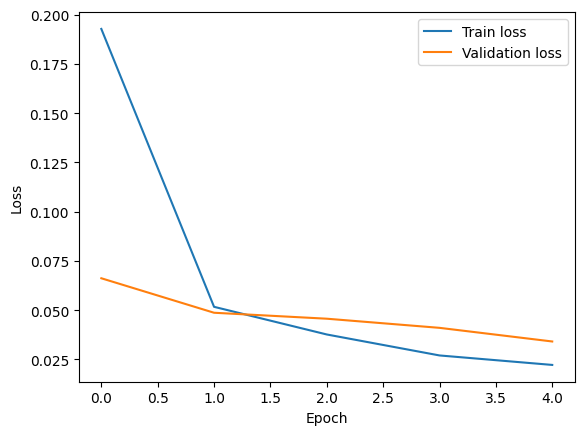

In [15]:
plt.plot(history.history['loss'], label = 'Train loss')
plt.plot(history.history['val_loss'], label= 'Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [16]:
# Evaluate the model
(test_loss, test_acc) = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9870 - loss: 0.0386
Test loss: 0.029172997921705246, Test accuracy: 0.9902999997138977


In [17]:
print(f"Test loss: {test_loss}, Test accuracy: {test_acc * 100}")

Test loss: 0.029172997921705246, Test accuracy: 99.02999997138977
